# Machine Learning (second part): Intermediate report

*Write your name and your student ID below.*

In [1]:
# Modify these lines.
student_name = '--'
student_id = '--'

Prepare an environment for running Python codes on Jupyter notebook. The most easiest way is to use [Google Colaboratory](https://colab.research.google.com/).

Write codes for the following four problems, and submit the notebook file (`.ipynb`) on OCW. **We do not accept a report in other formats (e.g., Word, PDF, HTML)**. You can use any deep learning library for completing this report. Write a code at the specified cell in the notebook. You can add more cells if necessary. Submit this report even if you cannot solve all problems.

These are the links to the sample codes used in the lecture:

+ [Binary classification](https://github.com/chokkan/deeplearning/blob/master/notebook/binary.ipynb)
+ [MNIST](https://github.com/chokkan/deeplearning/blob/master/notebook/mnist.ipynb)

*Please accept that your report may be shared among students who take this course.*

## 1. Multi-class classification on MNIST

Train a model on the training set of MNIST, and report the performance of the model on the test set in accuracy.

One can use the same code shown in the lecture. Write a code here and show the output.

In [2]:
import gzip
import sys
import struct
import urllib.request
import numpy as np

def read_image(fi):
    magic, n, rows, columns = struct.unpack(">IIII", fi.read(16))
    assert magic == 0x00000803
    assert rows == 28
    assert columns == 28
    rawbuffer = fi.read()
    assert len(rawbuffer) == n * rows * columns
    rawdata = np.frombuffer(rawbuffer, dtype='>u1', count=n*rows*columns)
    return rawdata.reshape(n, rows, columns).astype(np.float32) / 255.0

def read_label(fi):
    magic, n = struct.unpack(">II", fi.read(8))
    assert magic == 0x00000801
    rawbuffer = fi.read()
    assert len(rawbuffer) == n
    return np.frombuffer(rawbuffer, dtype='>u1', count=n)

def openurl_gzip(url):
    request = urllib.request.Request(
        url,
        headers={
            "Accept-Encoding": "gzip",
            "User-Agent": "Mozilla/5.0 (X11; U; Linux i686) Gecko/20071127 Firefox/2.0.0.11", 
        })
    response = urllib.request.urlopen(request)
    return gzip.GzipFile(fileobj=response, mode='rb')

if __name__ == '__main__':
    np.savez_compressed(
        'mnist',
        train_x=read_image(openurl_gzip('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')),
        train_y=read_label(openurl_gzip('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')),
        test_x=read_image(openurl_gzip('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')),
        test_y=read_label(openurl_gzip('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'))
    )

In [3]:
import numpy as np
data = np.load('mnist.npz')

print(data['train_x'].shape, data['train_x'].dtype)
print(data['train_y'].shape, data['train_y'].dtype)
print(data['test_x'].shape, data['test_x'].dtype)
print(data['test_y'].shape, data['test_y'].dtype)

(60000, 28, 28) float32
(60000,) uint8
(10000, 28, 28) float32
(10000,) uint8


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0


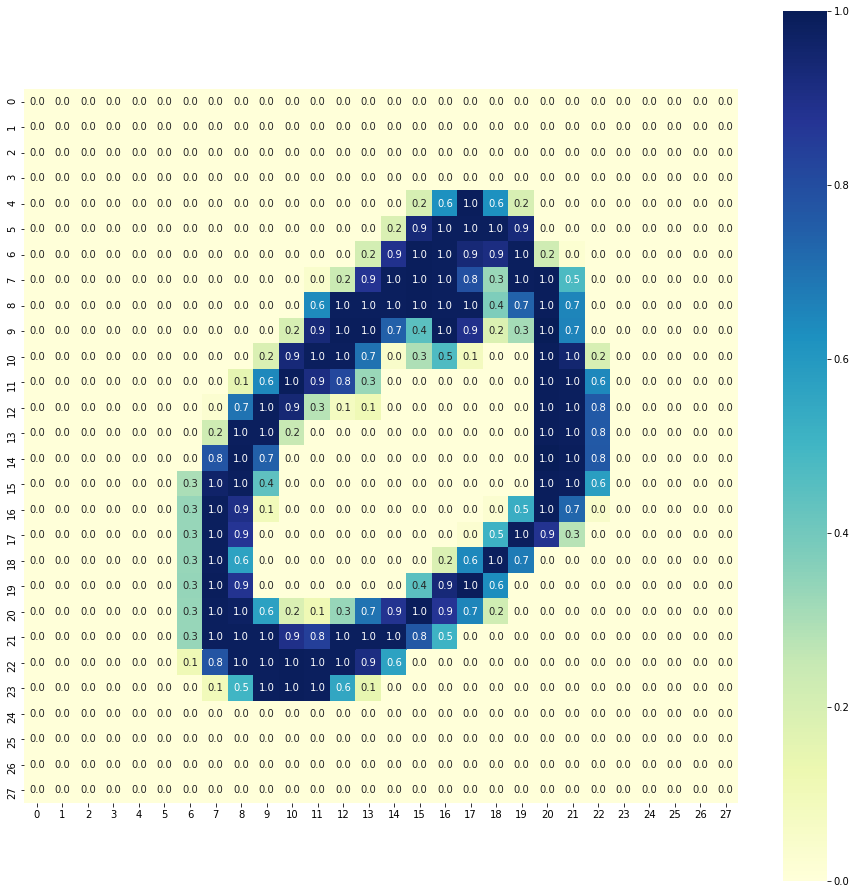

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Index number of an instance (change this to view another instance).
i = 1

data = np.load('mnist.npz')
image = data['train_x'][i]
label = data['train_y'][i]

print(label)
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(image, annot=True, fmt='.1f', square=True, cmap="YlGnBu")
plt.show()

In [5]:
# Perceptron algorithm for single-layer neural network

import numpy as np

def image_to_vector (X):
  X = np.reshape (X, (len(X), -1))
  return np.c_[X, np.ones (len(X))]

data = np.load ('mnist.npz')
Xtrain = image_to_vector (data ['train_x'])
Ytrain = data ['train_y']
Xtest = image_to_vector (data['test_x'])
Ytest = data ['test_y']

W = np.random.randn (10, 28*28+1)

eta = 0.001
for t in range (100):
  # Structured perceptron for updating weights.
  num_correct_train = 0
  for x, y in zip (Xtrain, Ytrain):
    y_pred = np.argmax (np.dot (W, x))
    if y_pred != y:
      W [y] += x * eta
      W [y_pred] -= x * eta
    else:
      num_correct_train += 1
    
  # Evaluate and store the accuracy on the test set.
  num_correct_test = 0
  for x, y in zip (Xtest, Ytest):
    y_pred = np.argmax (np.dot (W, x))
    if y_pred == y:
      num_correct_test += 1
  
  print ('#{}: train_accuracy={:.4f}, test_accuracy={:.4f}'.format(
      t,
      float (num_correct_train) / len (Ytrain),
      float (num_correct_test) / len (Ytest)
  ))

#0: train_accuracy=0.5869, test_accuracy=0.7596
#1: train_accuracy=0.7811, test_accuracy=0.8128
#2: train_accuracy=0.8167, test_accuracy=0.8359
#3: train_accuracy=0.8340, test_accuracy=0.8466
#4: train_accuracy=0.8446, test_accuracy=0.8548
#5: train_accuracy=0.8518, test_accuracy=0.8600
#6: train_accuracy=0.8570, test_accuracy=0.8635
#7: train_accuracy=0.8619, test_accuracy=0.8644
#8: train_accuracy=0.8649, test_accuracy=0.8677
#9: train_accuracy=0.8678, test_accuracy=0.8699
#10: train_accuracy=0.8695, test_accuracy=0.8701
#11: train_accuracy=0.8720, test_accuracy=0.8711
#12: train_accuracy=0.8736, test_accuracy=0.8724
#13: train_accuracy=0.8750, test_accuracy=0.8737
#14: train_accuracy=0.8769, test_accuracy=0.8753
#15: train_accuracy=0.8779, test_accuracy=0.8754
#16: train_accuracy=0.8784, test_accuracy=0.8754
#17: train_accuracy=0.8798, test_accuracy=0.8758
#18: train_accuracy=0.8804, test_accuracy=0.8770
#19: train_accuracy=0.8810, test_accuracy=0.8771
#20: train_accuracy=0.8819, te

## 2. Confusion matrix

Show a confusion matrix of the predictions of the model on the test set. This is an example of a confusion matrix.

![example](https://github.com/chokkan/deeplearningclass/blob/master/assignment/example-confusion-matrix.png?raw=1)

Write a code here and show the confusion matrix.

In [6]:
# Use W in question1.

confusion_matrix = np.zeros ((10, 10), dtype=int)

for x, y in zip (Xtest, Ytest):
  y_pred = np.argmax (np.dot (W, x))
  confusion_matrix [y][y_pred] += 1

print (confusion_matrix)

[[ 947    0    1    4    1   12    7    4    1    3]
 [   0 1092    5    4    2    4    4   10   14    0]
 [  13   13  861   42   11   14   22   13   37    6]
 [   5    3   23  882    1   47    1   16   17   15]
 [   3    2    6    4  872    2   15   12   13   53]
 [  12    2    6   40    8  772   19    7   19    7]
 [  16    1    9    1    7   28  888    2    6    0]
 [   2    7   19    7    9    3    0  935    2   44]
 [  14   14   15   46   12   67   17   14  749   26]
 [   7    4    1   13   30   10    0   47    7  890]]


## 3. Top-3 easy and confusing examples

Show the top three easy and three confusing, respectively, images where the model recognized their digits with strong confidences. More specifically, let $y_n$ and $\hat{y}_n$ the true and predicted, respectively, digits of the image $x_n$. We want to find three images with high $P(\hat{y}_n | x_n)$ when $y_n = \hat{y}_n$ (for easy three examples) and $y_n \neq \hat{y}_n$ (for confusing three examples).

For each example, please show $y_n$, $P(y_n | x_n)$, $\hat{y}_n$, and $P(\hat{y}_n | x_n)$ together with the image $x_n$. This is an example of an output for an image (you need this kind of outputs for top-three easy and top-three confusing images, in other words, for six images in total).

![example](https://github.com/chokkan/deeplearningclass/blob/master/assignment/example-confusing-sample.png?raw=1)

Write a code here and show the output.

Top3 easy examples.
True digit: 0 (0.9999998023946222);  Predication: 0 (0.9999998023946222)


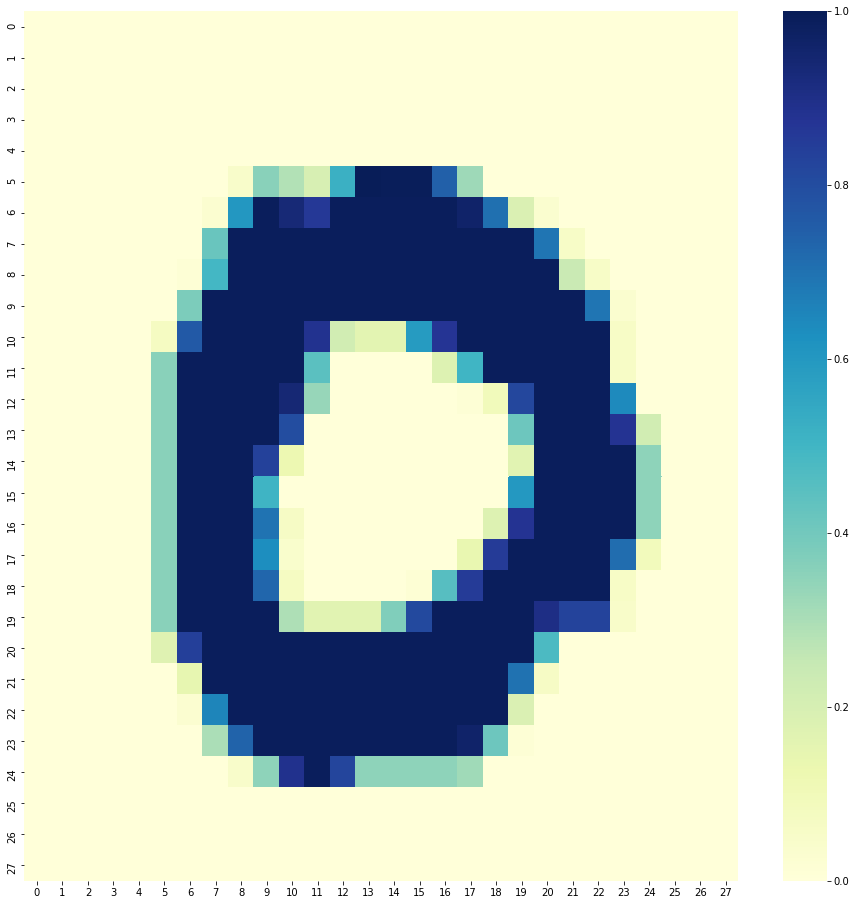

True digit: 0 (0.9999995890218769);  Predication: 0 (0.9999995890218769)


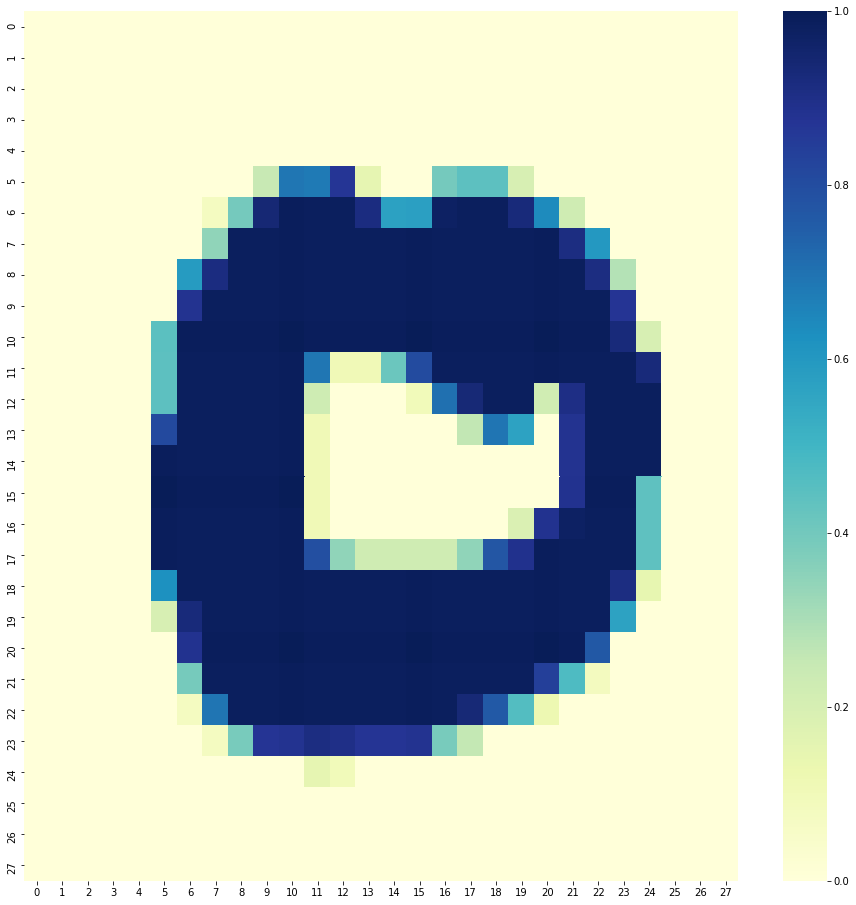

True digit: 0 (0.999999145768122);  Predication: 0 (0.999999145768122)


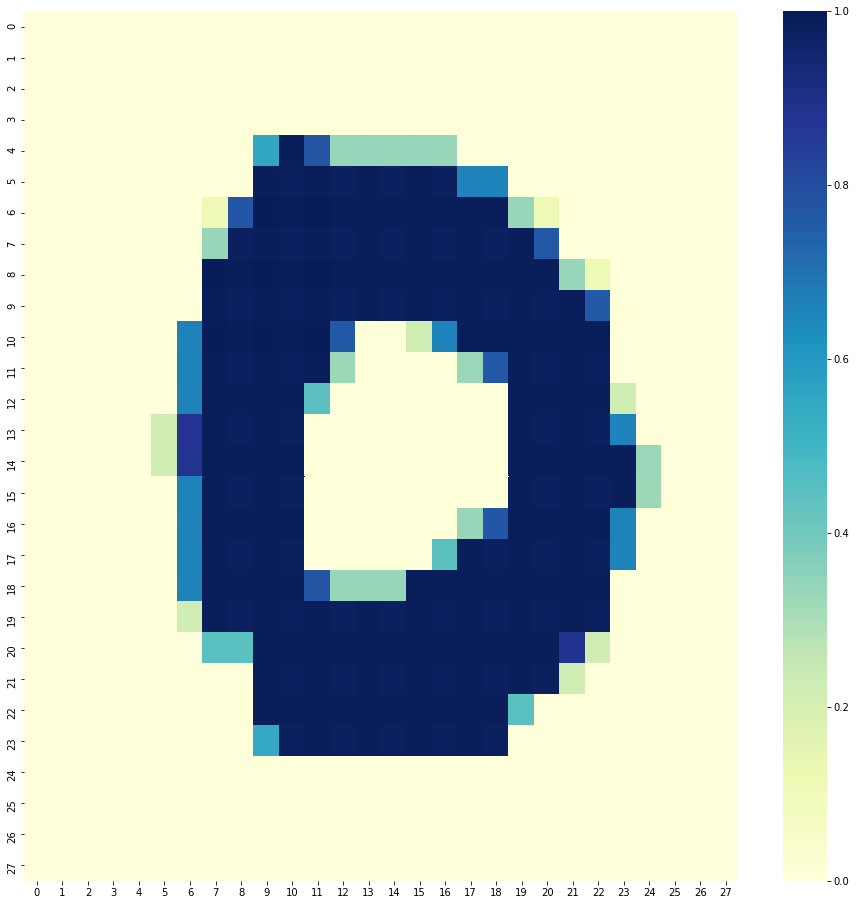

Top3 confusing examples.
True digit: 8 (0.0008453090593812982);  Predication: 0 (0.9978100989586716)


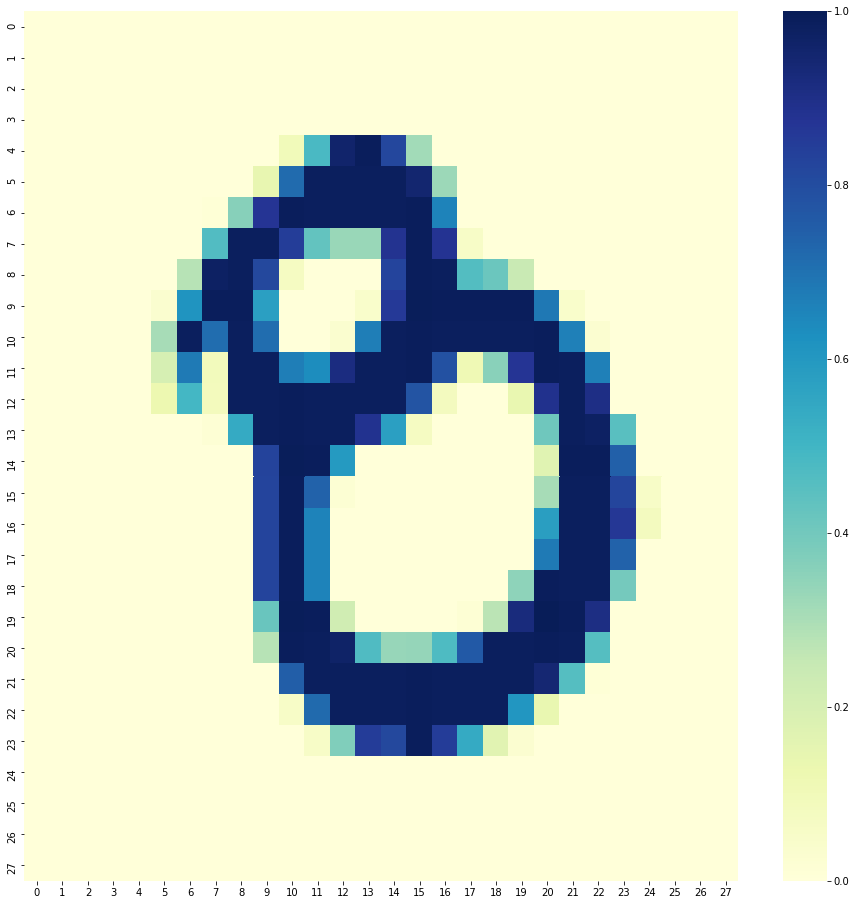

True digit: 6 (0.004604130876371852);  Predication: 0 (0.9946671637115855)


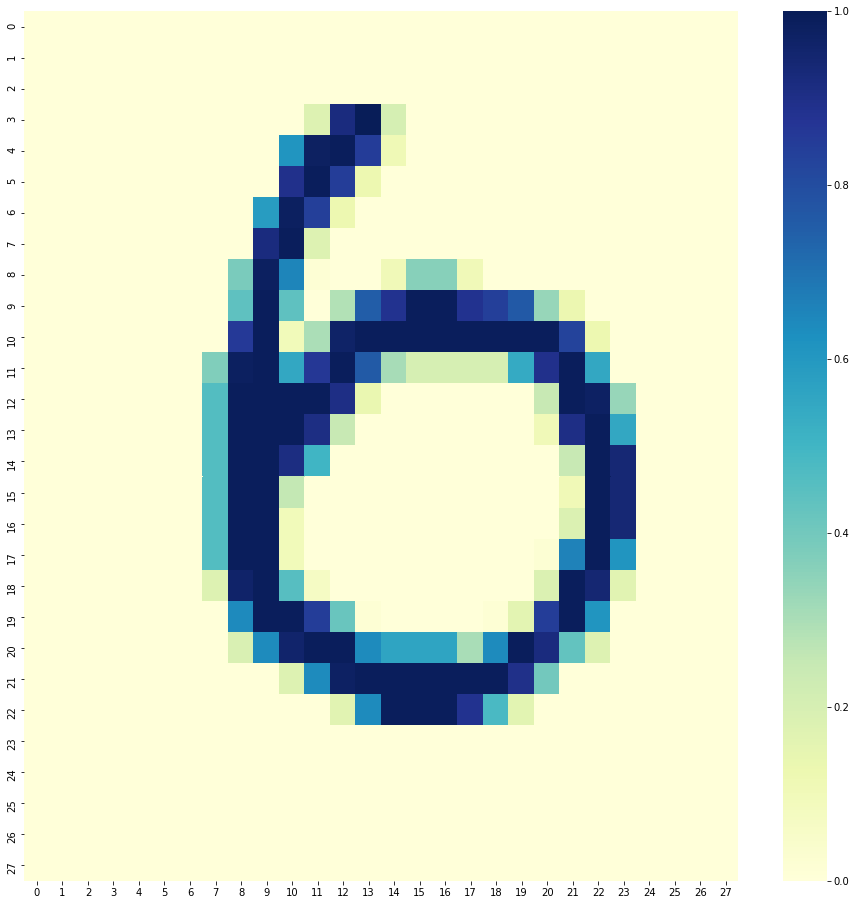

True digit: 8 (0.0013864655183650242);  Predication: 6 (0.9942133521440351)


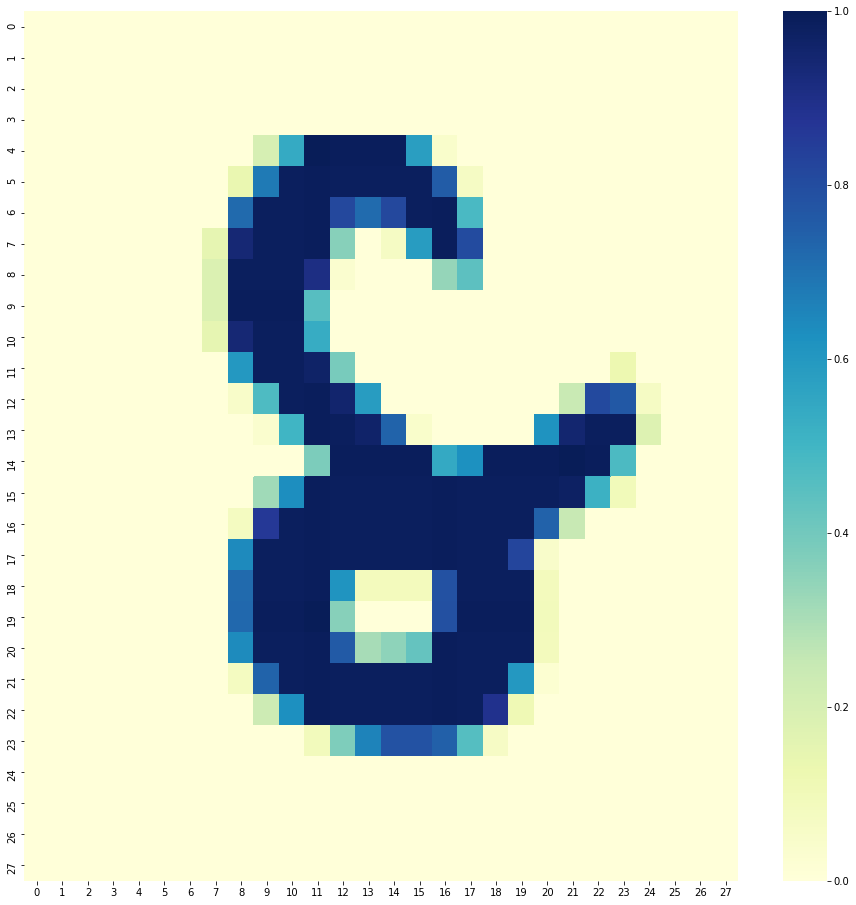

In [7]:

def one_vector_to_image (X):
  X = X[:-1]
  return np.reshape (X, [28, 28])

def set_top_3 (list, x, y, prob_y, y_pred, prob_pred):
  if len (list) < 3:
    list.append ((x, y, prob_y, y_pred, prob_pred))
  else:
    for i in range (3):
      if list [i] [4] < prob_pred:
        list.insert (i, (x, y, prob_y, y_pred, prob_pred))
        list.pop ()
        break
  list.sort (key=lambda m:m[4], reverse=True)
  return list

def print_top_3 (list):
  for i in range (3):
    image = one_vector_to_image (list [i] [0])
    true_digit = list [i] [1]
    prob_true = list [i] [2]
    pred_digit = list [i] [3]
    prob_pred = list [i] [4]
    print ('True digit: {} ({});  Predication: {} ({})'.format (
        true_digit,
        prob_true,
        pred_digit,
        prob_pred
      ))
    f, ax = plt.subplots (figsize=(16, 16))
    sns.heatmap (image, cmap="YlGnBu")
    plt.show ()


easy_example = []
confusing_example = []

for x, y in zip (Xtest, Ytest):
  predication_array = np.dot (W, x)
  y_pred = np.argmax (predication_array)
  exp_predication_array = np.exp (predication_array)
  sum_prob = sum (exp_predication_array)
  prob_y = exp_predication_array [y] / sum_prob
  prob_pred = exp_predication_array [y_pred] / sum_prob
  if y_pred == y:
    easy_example = set_top_3 (easy_example, x, y, prob_y, y_pred, prob_pred)
  else:
    confusing_example = set_top_3 (confusing_example, x, y, prob_y, y_pred, prob_pred)

print ('Top3 easy examples.')
print_top_3 (easy_example)
print ('Top3 confusing examples.')
print_top_3 (confusing_example)




## 4. Recognize your handwritten digits

Prepare three image files each of which presents a digit written by you. For each image, apply the MNIST model you trained, and show the probability estimate $\hat{y} \in \mathbb{R}^{10}$ (10-dimensional vector) for all possible digits as well as the image itself.

Please refer to [this notebook](https://colab.research.google.com/notebooks/io.ipynb) about how to upload a file to Google Colaboratory.

Saving Note-28.jpg to Note-28.jpg
Saving Note-29.jpg to Note-29.jpg
Saving Note-30.jpg to Note-30.jpg
(1668, 2154)
(28, 28)


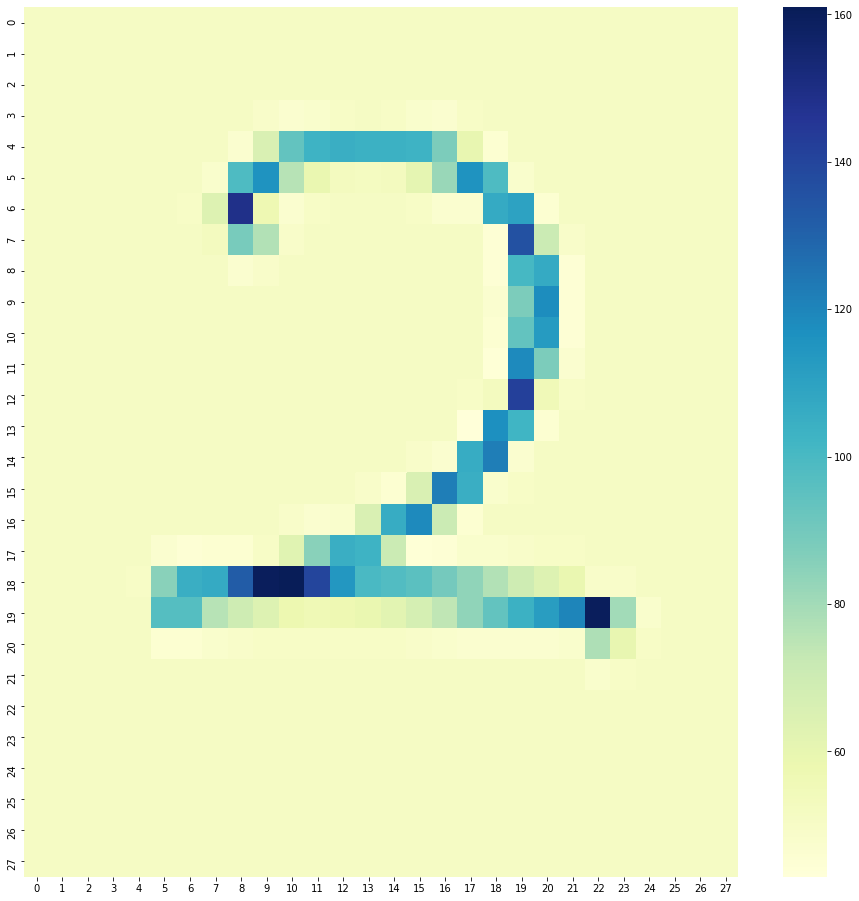

(1668, 2154)
(28, 28)


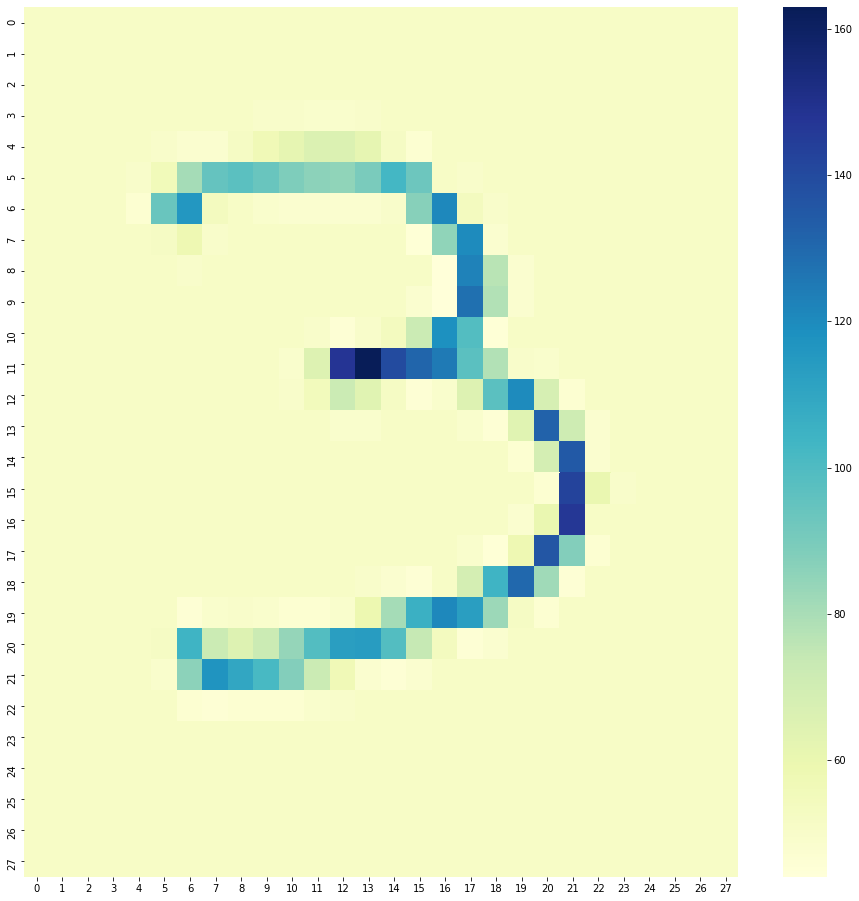

(1668, 2154)
(28, 28)


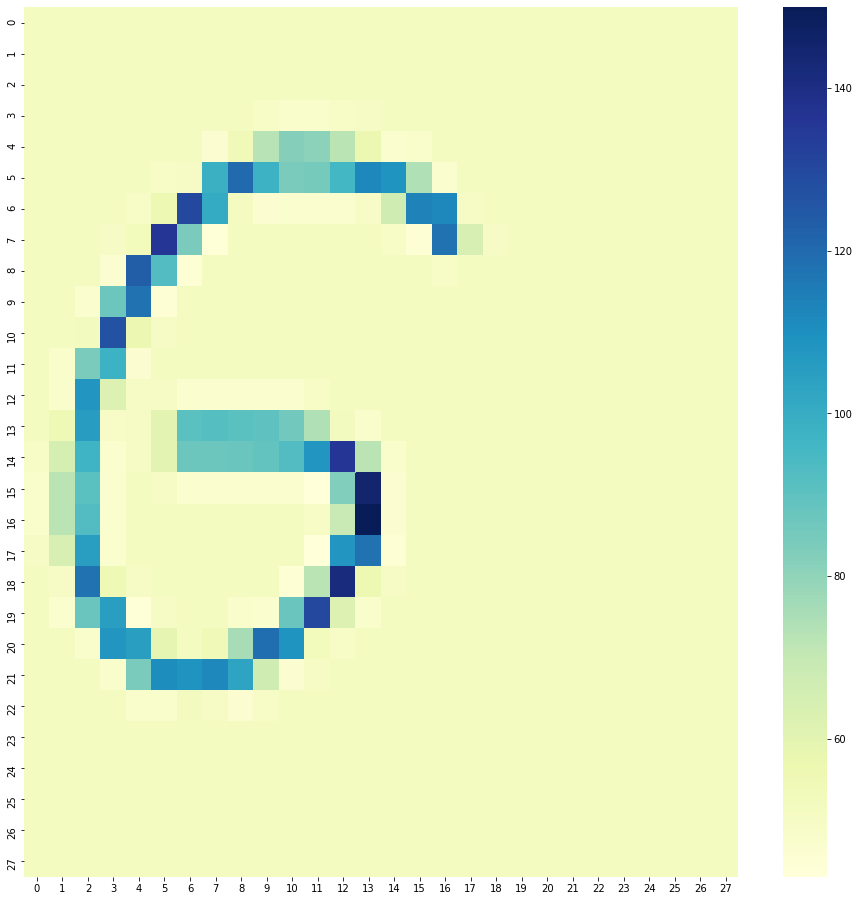

In [9]:
from google.colab import files
from PIL import Image

uploaded = files.upload ()

handwritten = []

for fn in uploaded.keys ():
  image = Image.open (fn).convert ('L')
  print (image.size)
  image = image.crop ((500, 0, 1200, 1200))
  image = image.resize ((28, 28))
  print (image.size)

  f, ax = plt.subplots(figsize=(16, 16))
  sns.heatmap(image, cmap="YlGnBu")
  plt.show()
  handwritten.append (image)

### Image #1

Write the code to show the image #1 here.

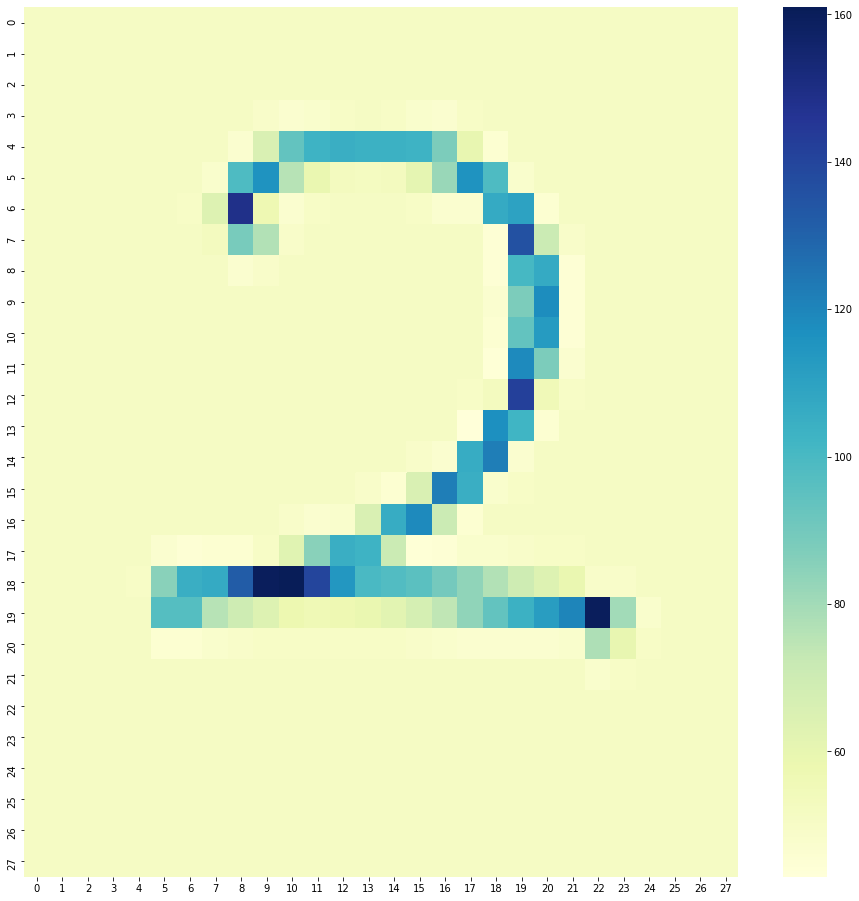

In [10]:
image = handwritten [0]
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(image, cmap="YlGnBu")
plt.show()

Write the code to show the probability estimate $\hat{y} \in \mathbb{R}^{10}$ for the image.

In [11]:
def one_image_to_vector (image):
  x = np.reshape (image, (1, -1))
  return np.append (x, 1)

x = one_image_to_vector (handwritten [0])
y = 2

y_pred = np.argmax (np.dot (W, x))
print ('y = {};  y_pred = {}'.format (
    y,
    y_pred
))

y = 2;  y_pred = 5


### Image #2

Write the code to show the image #2 here.

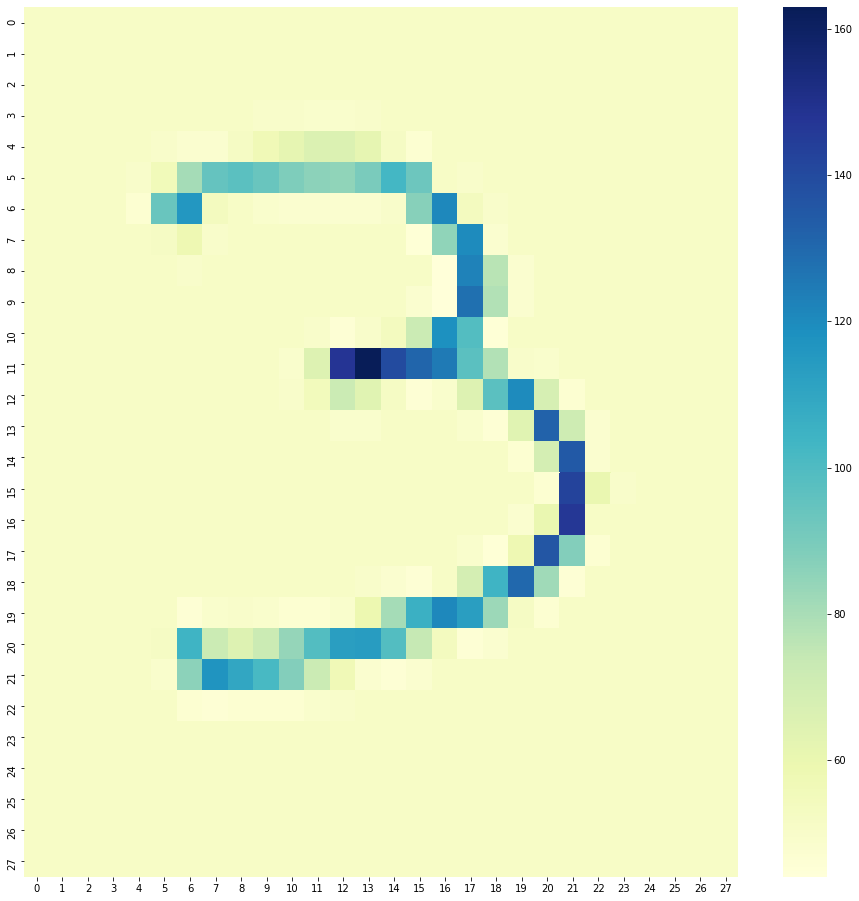

In [12]:
image = handwritten [1]
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(image, cmap="YlGnBu")
plt.show()

Write the code to show the probability estimate $\hat{y} \in \mathbb{R}^{10}$ for the image.


In [13]:

x = one_image_to_vector (handwritten [1])
y = 3

y_pred = np.argmax (np.dot (W, x))
print ('y = {};  y_pred = {}'.format (
    y,
    y_pred
))

y = 3;  y_pred = 5


### Image #3

Write the code to show the image #3 here.

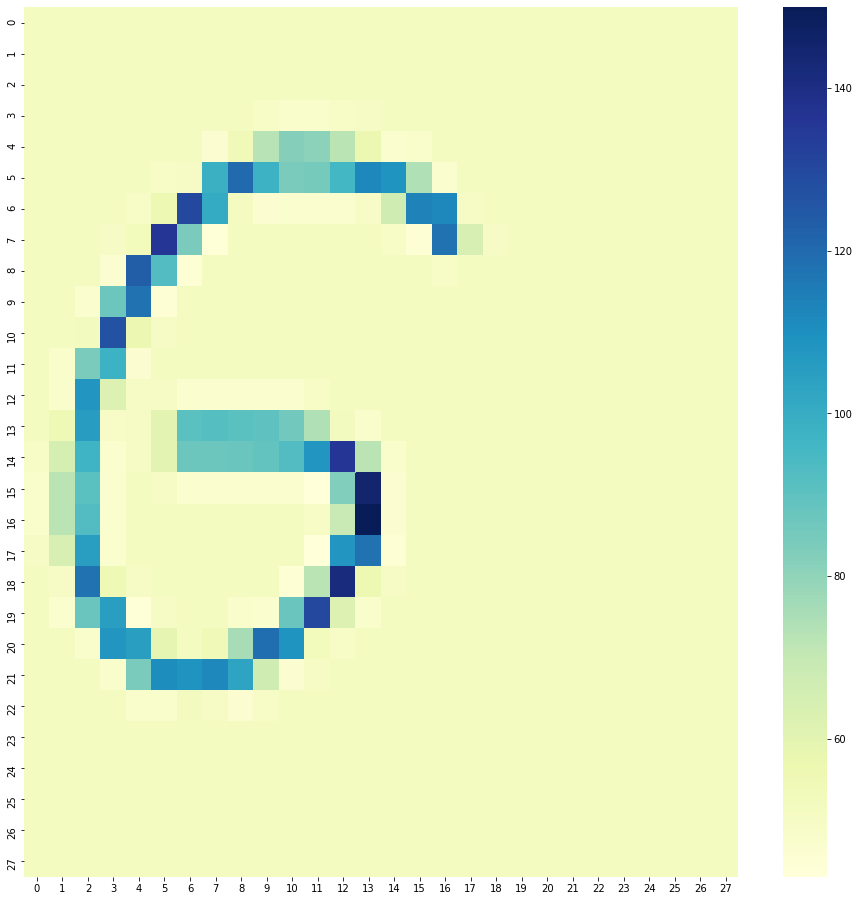

In [14]:
image = handwritten [2]
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(image, cmap="YlGnBu")
plt.show()

Write the code to show the probability estimate $\hat{y} \in \mathbb{R}^{10}$ for the image.

In [15]:

x = one_image_to_vector (handwritten [2])
y = 6

y_pred = np.argmax (np.dot (W, x))
print ('y = {};  y_pred = {}'.format (
    y,
    y_pred
))

y = 6;  y_pred = 3
